### 5주차 - 화소 점처리 예제
#### 로고 삽입
#### 워터마크 삽입
#### QR 코드 삽입


In [2]:
### Packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim" # 'AppleGothic' in mac

### ▶ 로고 삽입
#### 대상 영상에서 로고가 삽입될 위치의 화소값을 로고 이미지가 가진 화소값으로 변경

In [33]:
### 영상 읽기
img_jeju = cv2.imread(r"D:\2023\Image Process\jeju.JPG")
img_logo = cv2.imread(r"C:\Users\kr937\Desktop\jejulogo.png")
img_paris = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\paris.jpg")
img_paris_logo = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\paris logo.jpg")
img_paris.shape

(4032, 3024, 3)

In [25]:
### 영상 삽입 - 좌측 상단
# img_out 변수에 img_jeju 이미지 복사
img_out = img_paris.copy()

# img_logo의 높이, 너비, 채널 정보를 가져옴
h, w, c = img_paris_logo.shape

# img_logo를 img_out의 좌측 상단에 삽입
img_out[:h, :w, :] = img_paris_logo

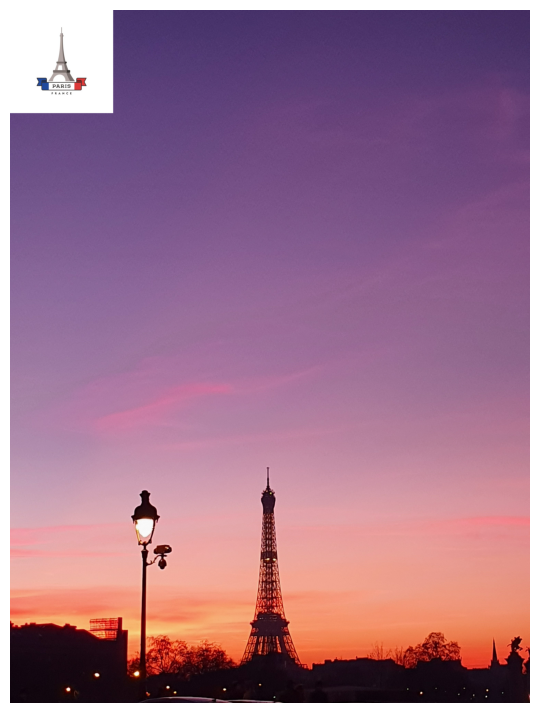

In [26]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### ▣ 예제
우측 하단에 로고 삽입

In [48]:
# img_out 변수에 img_paris 이미지 복사
img_out = img_paris.copy()

# img_logo의 높이, 너비, 채널 정보를 가져옴
h, w, c = img_paris_logo.shape

# img_logo를 img_out의 우측 하단에 삽입
# 삽입 위치는 (h,w)부터 (2h,2w)까지입니다. (x축: w~2w, y축: h~2h)
# 마지막 차원의 모든 값을 삽입합니다. (3채널)
img_out[-h:, -w:, :] = img_paris_logo


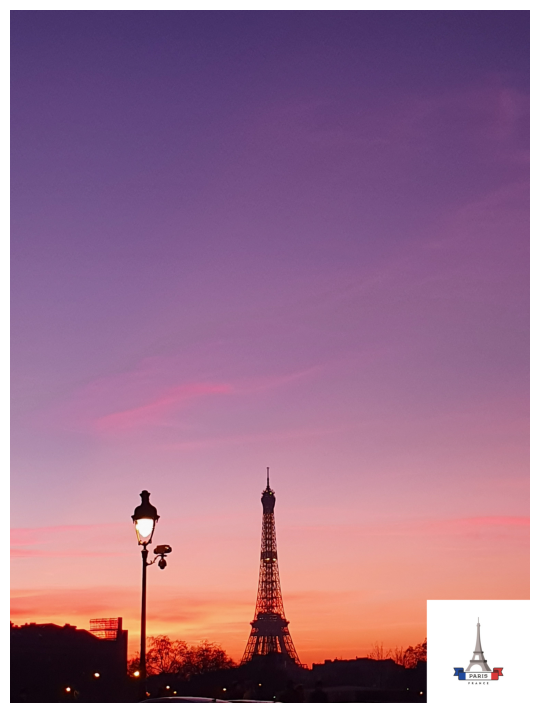

In [49]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [50]:
# img_out 변수에 img_jeju 이미지 복사
img_out = img_paris.copy()

# img_logo의 높이, 너비, 채널 정보를 가져옴
h, w, c = img_paris_logo.shape

# img_logo를 img_out의 좌측 하단에 삽입
# 삽입 위치는 (0,0)부터 (h,w)까지입니다. (x축: -w~0, y축: -h~0)
# 마지막 차원의 모든 값을 삽입합니다. (3채널)
img_out[-h:, :w, :] = img_paris_logo


(600, 600, 3)

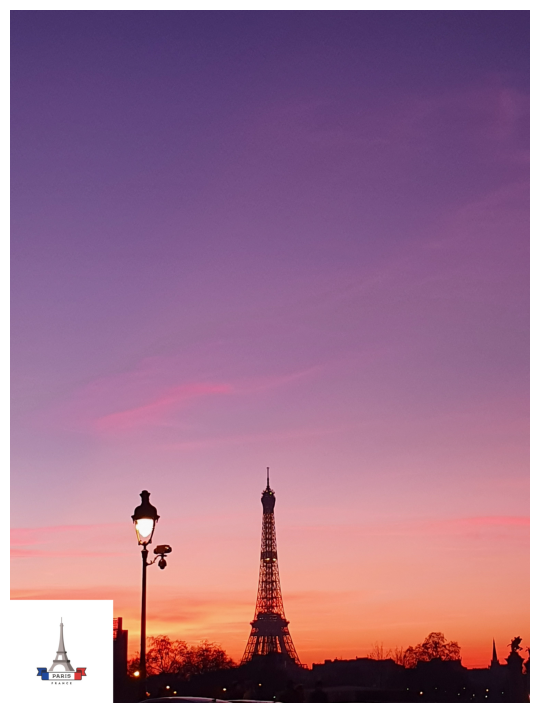

In [52]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [53]:
# img_out 변수에 img_jeju 이미지 복사
img_out = img_paris.copy()

# img_logo의 높이, 너비, 채널 정보를 가져옴
h, w, c = img_paris_logo.shape

# img_logo를 img_out의 우측 상단에 삽입
# 삽입 위치는 (0,0)부터 (h,w)까지입니다. (x축: -w~0, y축: -h~0)
# 마지막 차원의 모든 값을 삽입합니다. (3채널)
img_out[:h, -w:, :] = img_paris_logo


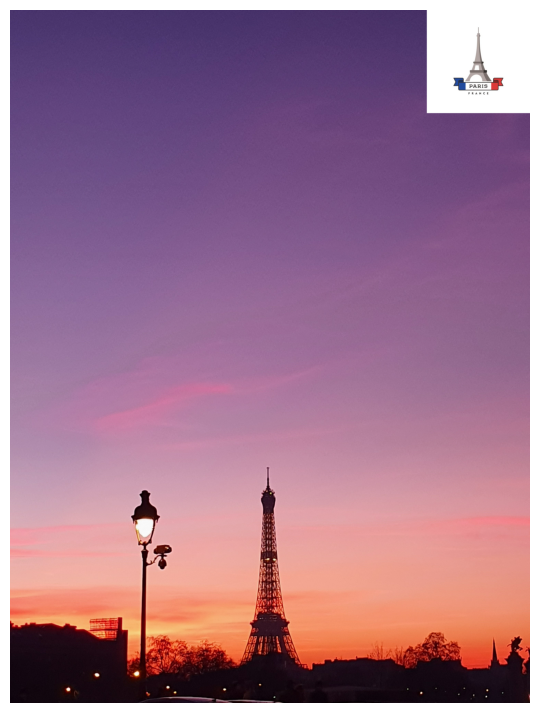

In [54]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### ▶ 워터마크 삽입
워터마크 이미지 생성 후 영상 혼합(image blending)

In [57]:
### 영상 읽기
img_only = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\paris logo.jpg")
img_only.shape

(600, 600, 3)

In [58]:
### 이진화 - grayscale
img_logo_gray = cv2.cvtColor(img_only, cv2.COLOR_BGR2GRAY)
_, img_logo_th = cv2.threshold(img_logo_gray, 200, 255, cv2.THRESH_BINARY_INV)

In [59]:
### 뺄셈 - 영상의 밝기 감소
img_logo_th_2 = cv2.add(img_logo_th, -240)
img_logo_th_2 = cv2.cvtColor(img_logo_th_2, cv2.COLOR_GRAY2BGR)

In [61]:
### 출력 영상
img_out = img_paris.copy()
### 대상 영역 추출
h, w, c = img_only.shape
img_out_sub = img_out[0:h, 0:w, :]

In [ ]:
### 좌측 하단
### 출력 영상
img_out = img_paris.copy()
### 대상 영역 추출
h, w, c = img_only.shape
img_out_sub = img_out[0:h, 0:w, :]

In [62]:
# 이미지 A와 이미지 B의 크기를 같게 조정
#img_out_sub = cv2.resize(img_logo_th, (img_logo_th_2.shape[1], img_logo_th_2.shape[0]))
#img_logo_th_2 = cv2.resize(img, (img_out_sub.shape[1], img_out_sub.shape[0]))

In [63]:
### 덧셈 - 영상의 밝기 증가
img_out_wm = cv2.add(img_out_sub, img_logo_th_2)

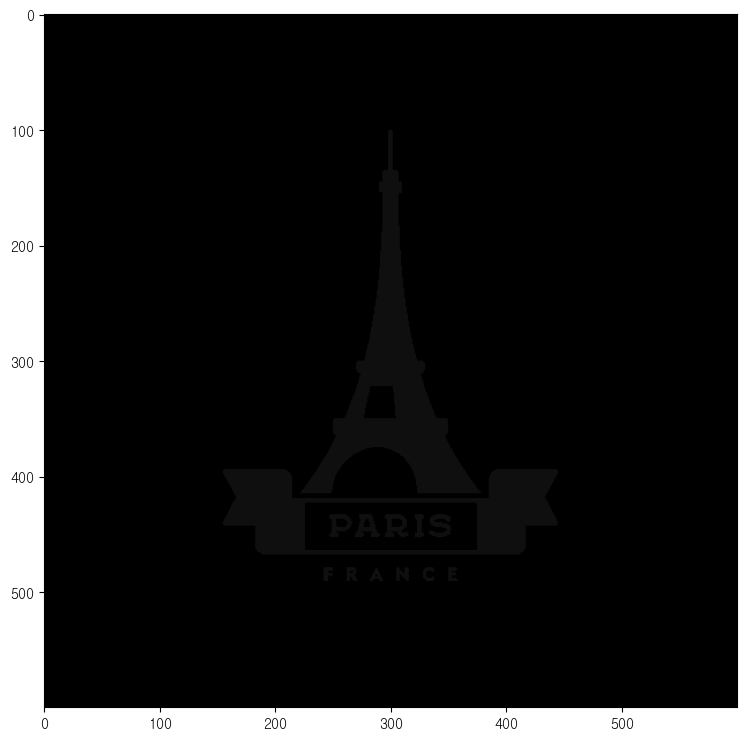

In [64]:
img_rgb = cv2.cvtColor(img_logo_th_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

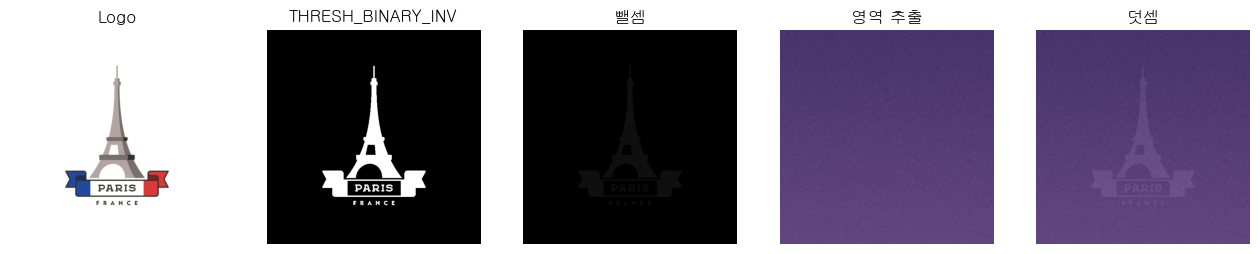

In [65]:
### 영상 출력
titles = ["Logo", "THRESH_BINARY_INV", "뺄셈", "영역 추출", "덧셈"]
images = [img_only, img_logo_th, img_logo_th_2, img_out_sub, img_out_wm]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()


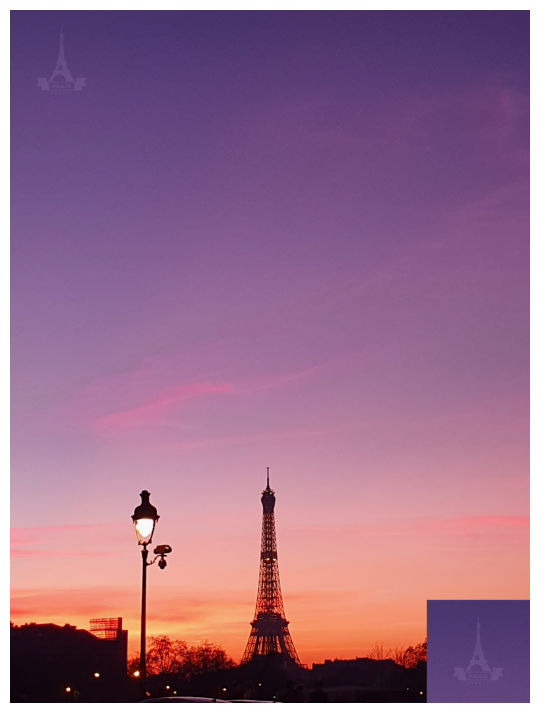

In [70]:
### 영상 삽입 - 좌측 상단
img_out[:h, :w, :] = img_out_wm
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### ▶ QR 코드
QR 코드(영어: QR code, Quick Response code)는 컴퓨터가 만든 흑백 격자무늬 패턴 코드로, 정보를 나타내는 매트릭스 형식의 이차원 코드   
한국, 일본, 중국, 영국, 미국 등에서 많이 사용   
덴소 웨이브의 등록 상표 'Quick Response'에서 유래   
숫자 외에 문자의 데이터를 저장   
숫자 최대 7,089 자   
영문자와 한글은 최대 4,296 자   
한자 1,817 자   
https://www.qrcode.com/ko/   
버전은 1~40으로 구성   
버전1(21×21cell)로 시작하여 가로/세로 각각 4cell씩 늘어,버전40(177×177cell)로 설정   


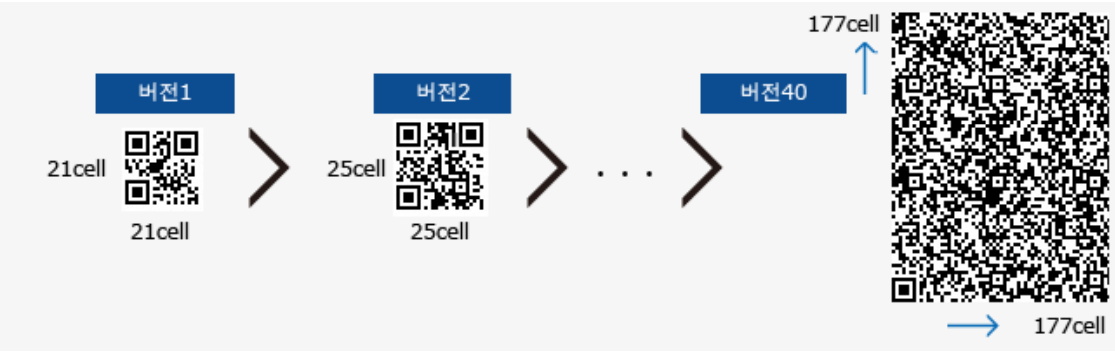

### ◼ QR 코드 생성
#### Google API
https://developers.google.com/chart/infographics/docs/qr_codes   
    https://chart.googleapis.com/chart?cht=qr&chs=200x200&chl=http://bigdata.hannam.ac.kr/

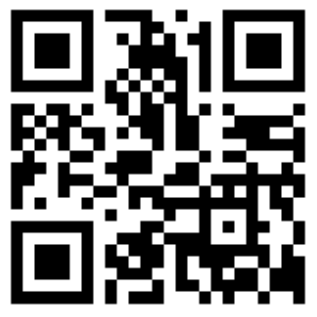

### Python
#### Package: qrcode
https://pypi.org/project/qrcode/    
https://github.com/lincolnloop/python-qrcode

In [124]:
### Package
import qrcode
import os


In [128]:
### 내용
msg = 'https://instagram.com/hnu_kidae?igshid=YmMyMTA2M2Y='
### QR image 생성
img_QR = qrcode.make(msg)

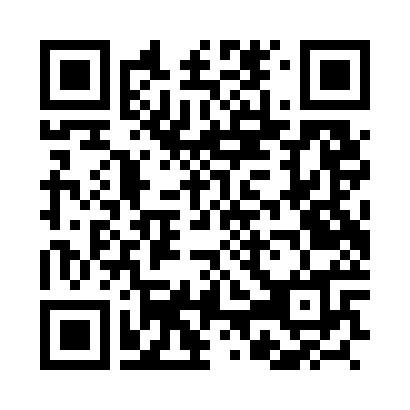

In [129]:
### QR 코드 출력
img_QR

In [130]:
### png 파일로 저장
img_QR.save('QR_BDA.png')

In [131]:
#### Get the current working directory - 파일 저장 위치 확인
os.getcwd()


'g:\\내 드라이브\\2023\\Image Process\\중간고사'

In [132]:
### QR 코드 삽입
img1 = cv2.imread(r"D:\2023\Image Process\sunrise.JPG")
img_qr_code = cv2.imread('QR_BDA.png')

In [142]:
### 크기 조정
# cv2.resize 함수를 사용하여 이미지 크기를 조정합니다.
# img_qr_code: 원본 이미지
# dsize: 결과 이미지의 크기. (0,0)으로 지정하면 fx, fy 값에 따라 자동으로 결정됩니다.
# fx: 가로 방향으로의 배율. 1.0으로 설정하여 원본 이미지의 가로 크기를 그대로 유지합니다.
# fy: 세로 방향으로의 배율. 1.0으로 설정하여 원본 이미지의 세로 크기를 그대로 유지합니다.
# interpolation: 이미지 크기를 조정할 때 사용할 보간법을 선택합니다. cv2.INTER_AREA를 사용하여 이미지를 축소할 때 좋은 성능을 보입니다.
img_qr_code_resize = cv2.resize(img_qr_code, dsize=(0, 0), fx=1.0, fy=1.0, interpolation=cv2.INTER_AREA)


In [143]:
### 영상 삽입 - 촤측 상단
# img_out에 img1을 복사합니다.
img_out = img1.copy()

# img_qr_code_resize의 크기를 가져옵니다.
h, w, c = img_qr_code_resize.shape

# img_out에 img_qr_code_resize를 삽입합니다.
# 삽입 위치는 (10,10)부터 (h+10,w+10)까지입니다. (x축: 10~10+w, y축: 10~10+h)
# 마지막 차원의 모든 값을 삽입합니다. (3채널)
img_out[10:h+10, 10:w+10, :] = img_qr_code_resize


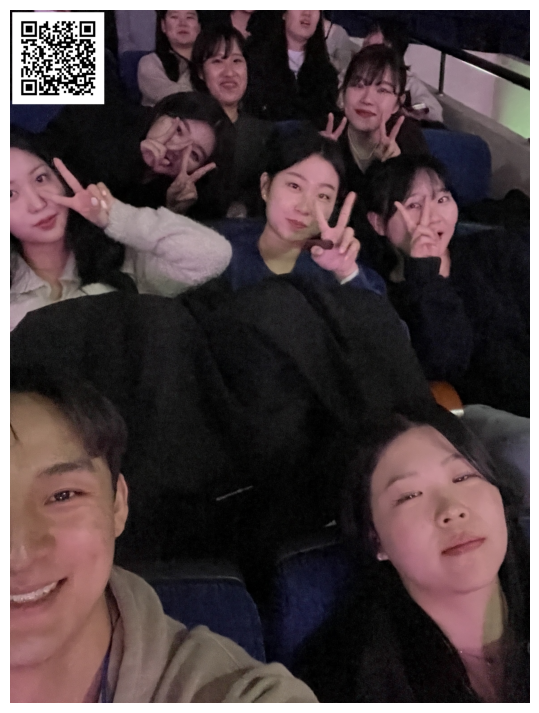

In [144]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [145]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\kidae_qr.png'
cv2.imwrite(out_file, img_out)


True